[Download DATASETS from here](https://drive.google.com/drive/folders/1cBv9fiBQE2PedVPvTu56tOMIOtJTjTj1?usp=sharing)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/Shareddrives/utshabkg/Dataset/serumLC.csv')
df1 = pd.read_csv('/content/drive/Shareddrives/utshabkg/Dataset/plasma_processed.csv')
df = df.T
col = {}
for i in range(df.shape[1]):
    col[i] = df.iloc[0, i]
# print(col)
df = df.rename(columns = col, inplace = False)
df = df.iloc[1:, :]
df.head()

,1_5-anhydroglucitol,1-monostearin,2_3-dihydroxybutanoic acid NIST,2_4-diaminobutyric acid,2-deoxyerythritol,2-deoxytetronic acid,2-hydroxybutanoic acid,2-hydroxyglutaric acid,2-hydroxyhippuric acid,2-hydroxyvaleric acid,2-ketoglucose dimethylacetal NIST,2-ketoisocaproic acid,3-(3-hydroxyphenyl)propionic acid,3-aminoisobutyric acid,3-hydroxybutanoic acid,3-hydroxybutyric acid,3-phosphoglycerate,5-hydroxynorvaline NIST,5-methoxytryptamine,acetoacetate,aconitic acid,adenosine-5-monophosphate,alanine,alloxanoic acid NIST,alpha-ketoglutarate,aminomalonate,arabitol,arachidic acid,arachidonic acid,asparagine,aspartic acid,azelaic acid,behenic acid,benzoic acid,beta-alanine,butane-2_3-diol NIST,butyrolactam NIST,capric acid,caprylic acid,cellobiose,...,p-cresol,pelargonic acid,phenol,phenylalanine,phenylethylamine,phosphate,phosphoethanolamine,pipecolinic acid,piperidone,proline,propane-1_3-diol NIST,pseudo uridine,pyrophosphate,pyrrole-2-carboxylic acid,pyruvic acid,quinic acid,ribose,salicylaldehyde,salicylic acid,serine,shikimic acid,stearic acid,sucrose,tartaric acid,taurine,threitol,threonic acid,threonine,tocopherol alpha-,tocopherol gamma-,trans-4-hydroxyproline,tryptophan,tyrosine,UDP-glucuronic acid,urea,uric acid,uridine,valine,xylitol,xylose
140516bjlsa04_1,9582,279,82,61,357,122,24944,56,32,966,70,6338,48,271,1602,2646,33,98,629,306,104,24,203008,41,248,752,235,1346,154,1336,1595,86,264,1050,937,281,342,187,416,441,...,36267,2238,1717,13187,99,7965,54,772,88,173034,608,478,2141,91,3149,196,113,69,31,8217,1405,99859,122,84,4540,337,849,12787,2028,251,2492,34239,54924,43,226295,11606,68,153849,194,811
140516bjlsa48_1,28847,161,78,84,205,258,10680,104,49,1076,75,6082,102,1104,300,1977,39,72,70,472,118,66,273015,85,160,965,262,948,276,1928,3204,117,460,1726,257,326,338,299,571,477,...,57611,3840,2126,15811,179,11304,72,672,95,141407,790,1052,1263,65,1849,41,177,403,234,9588,2758,71934,253,51,6454,219,651,12737,1850,641,3428,20080,37597,203,96226,10188,71,110735,294,910
140515bjlsa10_1,13627,162,53,133,139,159,27201,160,80,1117,60,6812,126,425,1127,4550,55,146,130,470,84,54,257699,54,184,724,361,1263,1642,1900,2336,251,317,3216,413,231,186,338,865,312,...,52348,11679,2770,11101,110,8000,60,546,54,88067,991,505,2482,83,721,461,186,276,1291,7523,1259,130069,121,50,4608,152,1833,10888,3722,551,2796,29191,28707,211,155596,16617,123,95509,253,804
140516bjlsa02_1,20758,6671,93,78,335,225,32347,242,59,304,53,1014,93,1953,543,34837,75,151,70,400,82,34,122666,103,142,1009,46,1857,908,1513,3493,148,458,2072,264,117,464,296,658,180,...,66050,6030,1985,14371,652,13248,56,481,50,72115,888,957,2277,71,156,82,181,135,102,13751,1681,173705,109,85,6287,265,1880,12901,2128,420,3161,16637,27873,71,191671,15214,84,96219,157,806
140516bjlsa18_1,15692,108,98,69,250,120,18357,60,25,1220,74,6319,713,800,1389,5288,34,421,194,302,123,31,247523,52,138,1980,350,688,334,1809,1202,156,255,1413,867,218,189,231,468,78,...,35498,3510,745,14421,111,19080,38,183,72,100497,513,904,1141,59,1147,2428,266,167,65,9956,1249,65181,36,29,2854,408,495,15442,1483,401,5552,29820,30132,200,333019,20281,62,159853,188,1226


In [ ]:
df.shape

(82, 158)

In [ ]:
# from sklearn.cluster import KMeans
# kmeans = KMeans(n_clusters=2, random_state=0).fit(df)
# kmeans.labels_

In [ ]:
df.isnull().sum()/len(df) * 100

1_5-anhydroglucitol               0.00
1-monostearin                     0.00
2_3-dihydroxybutanoic acid NIST   0.00
2_4-diaminobutyric acid           0.00
2-deoxyerythritol                 0.00
                                  ... 
uric acid                         0.00
uridine                           0.00
valine                            0.00
xylitol                           0.00
xylose                            0.00
Length: 158, dtype: float64

In [ ]:
labels = np.reshape(df1.Class.to_numpy(), (82,1))
# labels = np.reshape(kmeans.labels_, (82,1))
# labels

In [ ]:
col = []
for i in range(len(df.columns)):
    col.append(df.columns[i])
col.append('Class')
df = np.concatenate([df, labels], axis=1)
df = pd.DataFrame(df, columns = col)
# df.to_csv('serum_preocessed.csv')

In [ ]:
df.head()

,1_5-anhydroglucitol,1-monostearin,2_3-dihydroxybutanoic acid NIST,2_4-diaminobutyric acid,2-deoxyerythritol,2-deoxytetronic acid,2-hydroxybutanoic acid,2-hydroxyglutaric acid,2-hydroxyhippuric acid,2-hydroxyvaleric acid,2-ketoglucose dimethylacetal NIST,2-ketoisocaproic acid,3-(3-hydroxyphenyl)propionic acid,3-aminoisobutyric acid,3-hydroxybutanoic acid,3-hydroxybutyric acid,3-phosphoglycerate,5-hydroxynorvaline NIST,5-methoxytryptamine,acetoacetate,aconitic acid,adenosine-5-monophosphate,alanine,alloxanoic acid NIST,alpha-ketoglutarate,aminomalonate,arabitol,arachidic acid,arachidonic acid,asparagine,aspartic acid,azelaic acid,behenic acid,benzoic acid,beta-alanine,butane-2_3-diol NIST,butyrolactam NIST,capric acid,caprylic acid,cellobiose,...,pelargonic acid,phenol,phenylalanine,phenylethylamine,phosphate,phosphoethanolamine,pipecolinic acid,piperidone,proline,propane-1_3-diol NIST,pseudo uridine,pyrophosphate,pyrrole-2-carboxylic acid,pyruvic acid,quinic acid,ribose,salicylaldehyde,salicylic acid,serine,shikimic acid,stearic acid,sucrose,tartaric acid,taurine,threitol,threonic acid,threonine,tocopherol alpha-,tocopherol gamma-,trans-4-hydroxyproline,tryptophan,tyrosine,UDP-glucuronic acid,urea,uric acid,uridine,valine,xylitol,xylose,Class
0,9582,279,82,61,357,122,24944,56,32,966,70,6338,48,271,1602,2646,33,98,629,306,104,24,203008,41,248,752,235,1346,154,1336,1595,86,264,1050,937,281,342,187,416,441,...,2238,1717,13187,99,7965,54,772,88,173034,608,478,2141,91,3149,196,113,69,31,8217,1405,99859,122,84,4540,337,849,12787,2028,251,2492,34239,54924,43,226295,11606,68,153849,194,811,disease
1,28847,161,78,84,205,258,10680,104,49,1076,75,6082,102,1104,300,1977,39,72,70,472,118,66,273015,85,160,965,262,948,276,1928,3204,117,460,1726,257,326,338,299,571,477,...,3840,2126,15811,179,11304,72,672,95,141407,790,1052,1263,65,1849,41,177,403,234,9588,2758,71934,253,51,6454,219,651,12737,1850,641,3428,20080,37597,203,96226,10188,71,110735,294,910,disease
2,13627,162,53,133,139,159,27201,160,80,1117,60,6812,126,425,1127,4550,55,146,130,470,84,54,257699,54,184,724,361,1263,1642,1900,2336,251,317,3216,413,231,186,338,865,312,...,11679,2770,11101,110,8000,60,546,54,88067,991,505,2482,83,721,461,186,276,1291,7523,1259,130069,121,50,4608,152,1833,10888,3722,551,2796,29191,28707,211,155596,16617,123,95509,253,804,disease
3,20758,6671,93,78,335,225,32347,242,59,304,53,1014,93,1953,543,34837,75,151,70,400,82,34,122666,103,142,1009,46,1857,908,1513,3493,148,458,2072,264,117,464,296,658,180,...,6030,1985,14371,652,13248,56,481,50,72115,888,957,2277,71,156,82,181,135,102,13751,1681,173705,109,85,6287,265,1880,12901,2128,420,3161,16637,27873,71,191671,15214,84,96219,157,806,disease
4,15692,108,98,69,250,120,18357,60,25,1220,74,6319,713,800,1389,5288,34,421,194,302,123,31,247523,52,138,1980,350,688,334,1809,1202,156,255,1413,867,218,189,231,468,78,...,3510,745,14421,111,19080,38,183,72,100497,513,904,1141,59,1147,2428,266,167,65,9956,1249,65181,36,29,2854,408,495,15442,1483,401,5552,29820,30132,200,333019,20281,62,159853,188,1226,disease


# PCA

In [ ]:
from sklearn.decomposition import PCA
def pca_analysis(n_components):
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(df.iloc[:, :-1].values)

    pca_concatenate = np.concatenate([pca_result, labels], axis=1)

    return pca_concatenate

In [ ]:
def make_dataframe(array, n_features):
    col = []
    for i in range(1, n_features+1):
        col.append(f'pc{i}')
    col.append('Class')
    return pd.DataFrame(array, columns = col)

In [ ]:
pca2 = pca_analysis(2)

pca2_df = make_dataframe(pca2, 2)
print(pca2_df.head)

<bound method NDFrame.head of           pc1       pc2    Class
0    11332.53   4098.77  disease
1  -132611.62 -31954.64  disease
2  -102831.61  62820.20  disease
3      925.50 -41072.42  disease
4   113919.31  61849.36  disease
..        ...       ...      ...
77   52214.34 -47499.41  control
78   79846.58  58143.49  control
79   85498.10 -52927.35  control
80   70242.53  59060.97  control
81  -19389.15 -56670.29  control

[82 rows x 3 columns]>


<Figure size 432x288 with 0 Axes>

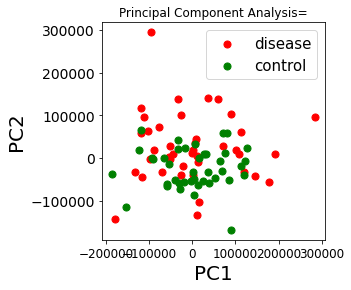

In [ ]:
plt.figure()
plt.figure(figsize=(4, 4))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('PC1',fontsize=20)
plt.ylabel('PC2',fontsize=20)
plt.title("Principal Component Analysis=",fontsize=12)
targets = ['disease', 'control']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = df.Class == target
    plt.scatter(pca2_df.loc[indicesToKeep, 'pc1']
               , pca2_df.loc[indicesToKeep, 'pc2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

In [ ]:
def plotting(pca_df, n_components):
    fig, axes = plt.subplots(nrows=n_components-1, ncols=4, figsize=(20, 8))

    for i in range(n_components):
        for j in range(i+1, n_components):
            if j==n_components:
                break
            axes[i, j-1].set_xlabel(f'PC{i+1}',fontsize=20)
            axes[i, j-1].set_ylabel(f'PC{j+1}',fontsize=20)
            for target, color in zip(targets,colors):
                indicesToKeep = df.Class == target
                axes[i, j-1].scatter(pca_df.loc[indicesToKeep, f'pc{i+1}']
                                , pca_df.loc[indicesToKeep, f'pc{j+1}'], c = color, s = 50)

In [ ]:
pca3 = pca_analysis(3)

pca3_df = make_dataframe(pca3, 3)
# print(pca3_df.head)

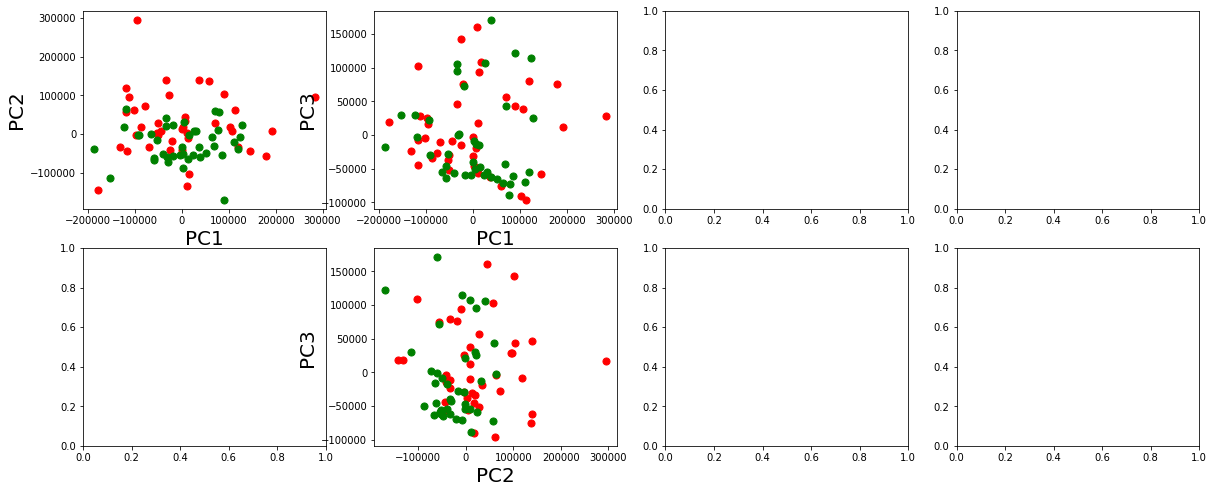

In [ ]:
plotting(pca3_df, 3)

In [ ]:
pca4 = pca_analysis(4)

pca4_df = make_dataframe(pca4, 4)
# print(pca4_df.head)

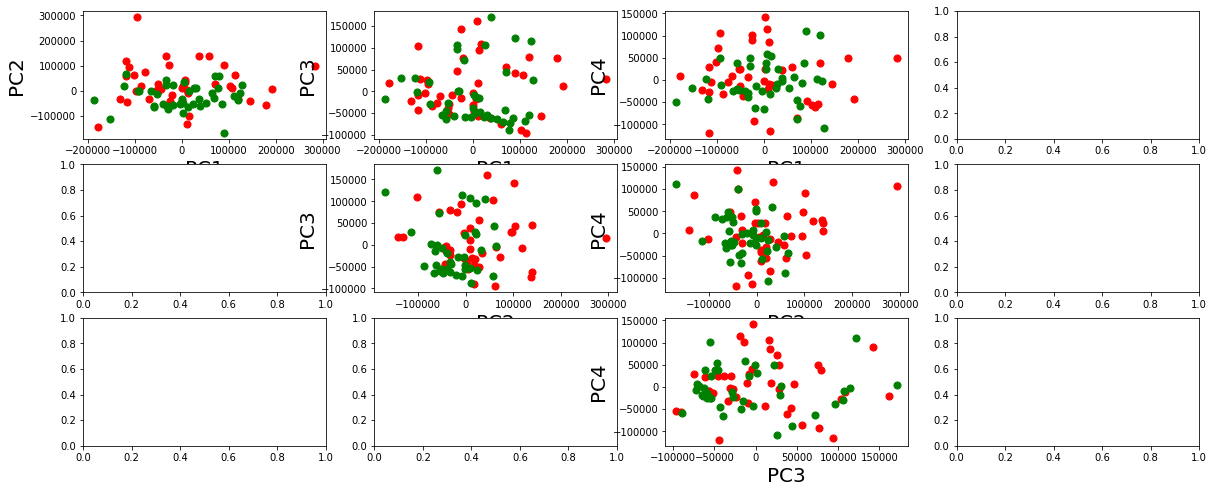

In [ ]:
plotting(pca4_df, 4)

In [ ]:
pca5 = pca_analysis(5)

pca5_df = make_dataframe(pca5, 5)
# print(pca5_df.head)

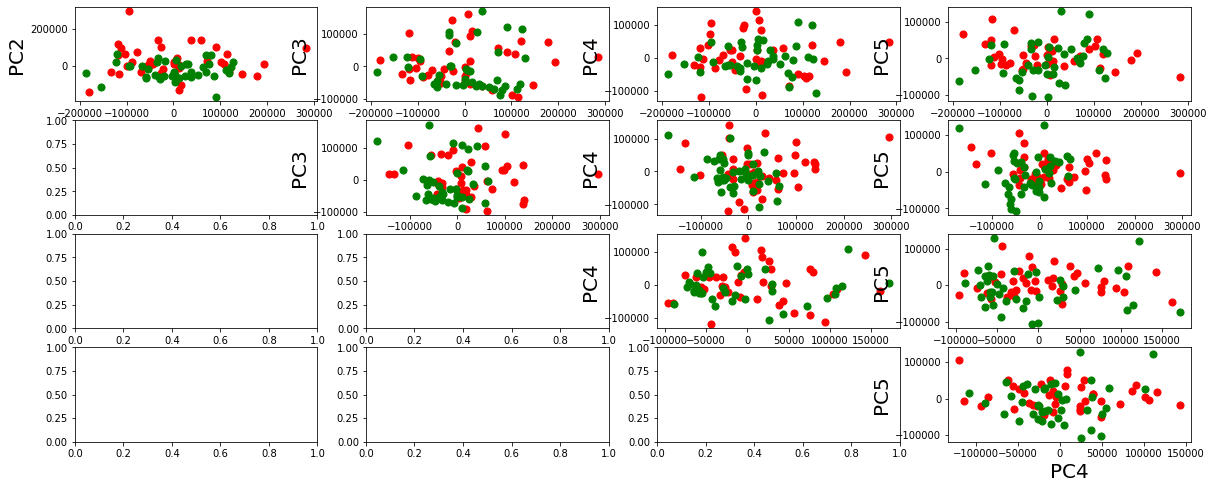

In [ ]:
plotting(pca5_df, 5)

In [ ]:
# now do PCA for 10, 15, 20
pca10 = pca_analysis(10)
pca10_df = make_dataframe(pca10, 10)

pca15 = pca_analysis(15)
pca15_df = make_dataframe(pca15, 15)

pca20 = pca_analysis(20)
pca20_df = make_dataframe(pca20, 20)
# print(pca20_df.head)

In [ ]:
# pca15_df.to_csv("pca15.csv")

#t-SNE

In [ ]:
from sklearn.manifold import TSNE
def tsne_analysis(n_components):
    tsne = TSNE(n_components=n_components)
    tsne_result = tsne.fit_transform(df.iloc[:, :-1].values)

    tsne_concatenate = np.concatenate([tsne_result, labels], axis=1)

    return tsne_concatenate

In [ ]:
def tsne_dataframe(array, n_features):
    col = []
    for i in range(1, n_features+1):
        col.append(f'tsne{i}')
    col.append('Class')
    return pd.DataFrame(array, columns = col)

In [ ]:
def tsne_plotting(tsne_df, n_components):
    fig, axes = plt.subplots(nrows=n_components-1, ncols=4, figsize=(20, 8))

    for i in range(n_components):
        for j in range(i+1, n_components):
            if j==n_components:
                break
            axes[i, j-1].set_xlabel(f'TSNE{i+1}',fontsize=20)
            axes[i, j-1].set_ylabel(f'TSNE{j+1}',fontsize=20)
            for target, color in zip(targets,colors):
                indicesToKeep = df.Class == target
                axes[i, j-1].scatter(tsne_df.loc[indicesToKeep, f'tsne{i+1}']
                                , tsne_df.loc[indicesToKeep, f'tsne{j+1}'], c = color, s = 50)

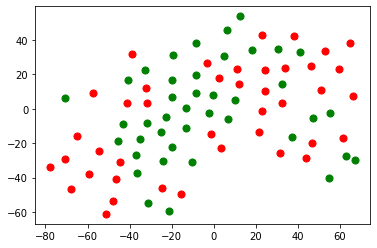

In [ ]:
tsne2 = tsne_analysis(2)

tsne2_df = tsne_dataframe(tsne2, 2)
# print(tsne2_df.head)
# plotting(tsne2_df, 1, 1)

for target, color in zip(targets,colors):
    indicesToKeep = df.Class == target
    plt.scatter(tsne2_df.loc[indicesToKeep, 'tsne1']
               , tsne2_df.loc[indicesToKeep, 'tsne2'], c = color, s = 50)

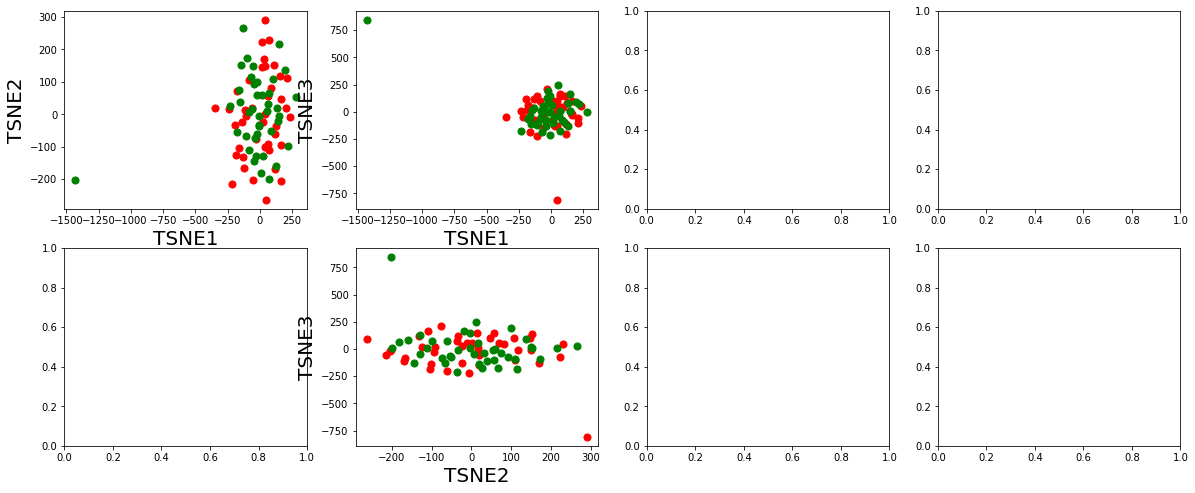

In [ ]:
tsne3 = tsne_analysis(3)

tsne3_df = tsne_dataframe(tsne3, 3)
# print(tsne2_df.head)
tsne_plotting(tsne3_df, 3)


In [ ]:
# tsne2_df.to_csv('tsne2.csv')

# Models

In [ ]:
# !pip install lazypredict

In [ ]:
X = pca20_df.drop('Class', axis=1)
y = pca20_df['Class'].copy()
y = y.map({"control": 1, "disease": 0})

X.shape, y.shape

((82, 20), (82,))

In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [ ]:
y.value_counts()

1    41
0    41
Name: Class, dtype: int64

In [ ]:
import lazypredict
from lazypredict.Supervised import LazyClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import classification_report

from sklearn.model_selection import train_test_split, StratifiedKFold

In [ ]:
result = []
# for i in range(10):
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=matthews_corrcoef, predictions=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X.head

<bound method NDFrame.head of           pc1       pc2       pc3  ...     pc18     pc19      pc20
0    11332.53   4098.77 -56439.81  ... -4031.37  4373.10   6807.37
1  -132611.62 -31954.64 -23372.07  ...  1859.60  8482.01  -5703.61
2  -102831.61  62820.20  -4142.31  ...  3883.32 -3383.34    -28.50
3      925.50 -41072.42  -3271.30  ...  6733.92  -840.68  -7569.87
4   113919.31  61849.36 -95822.00  ... -3634.09 -2311.85  -8630.51
..        ...       ...       ...  ...      ...      ...       ...
77   52214.34 -47499.41 -64773.06  ...  9078.57  1467.56   3843.21
78   79846.58  58143.49 -72671.76  ... -1360.54 -2509.33  -3203.35
79   85498.10 -52927.35 -61290.67  ...  1431.79  -790.00 -12631.30
80   70242.53  59060.97  43750.75  ...  5366.32 -7063.66   4263.91
81  -19389.15 -56670.29  72379.58  ...   690.60 -1292.52  -6887.77

[82 rows x 20 columns]>

In [ ]:
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
# model_dictionary = clf.provide_models(X, X_test, y, y_test)
# print(models.shape)
# result.append(models.iloc[:, :])
# print(i, X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# print(predictions)

models

100%|██████████| 29/29 [00:00<00:00, 34.57it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,matthews_corrcoef,Time Taken
Model,,,,,,


No result coming using:

```
clf.fit(X_train, X_test, y_train, y_test)
```

Accuracy comes 100% using:

```
clf.fit(X, X_test, y, y_test)
```



## Review (Fuad)

In [ ]:
!pip install lazypredict

     |████████████████████████████████| 1.2MB 5.1MB/s 
     |████████████████████████████████| 81kB 5.8MB/s 
     |████████████████████████████████| 6.8MB 13.9MB/s 
     |████████████████████████████████| 14.5MB 281kB/s 
     |████████████████████████████████| 276kB 38.2MB/s 
     |████████████████████████████████| 127.6MB 62kB/s 
     |████████████████████████████████| 25.9MB 1.6MB/s 
     |████████████████████████████████| 10.1MB 37.7MB/s 
     |████████████████████████████████| 307kB 49.0MB/s 
     |████████████████████████████████| 256kB 38.0MB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86_64.whl size=44620 sha256=29bea8bde06e8cb7cda6b234b00a38fb09f67a1a00513c838e2f5093dbc40d16
  Stored in directory: /root/.cache/pip/wheels/a7/c1/ea/cf5bd31012e735dc1dfea3131a2d5eae7978b251083d6247bd
Successfully built PyYAML
ERROR: tensorflow 2.4.1 has requirement numpy~=1.19.2, but you'll have numpy 1.19.1 which is incompatible.
ERROR: google-colab 1.0.0 has requirement

In [ ]:
!gdown --id 1GRpLNpEz5_B0B6Afecrl5JcbsHr1G5uc
!gdown --id 1WJ5Xkij0jpTARakBAvGGBX9pZVWVwVdN
!gdown --id 1Ee4pPuUJDZY36bnEQoBhJVTYyk-FXIRC
!gdown --id 166sbcZChiwBPF_n7bRscJu1HYOffuGW4

Downloading...
From: https://drive.google.com/uc?id=1GRpLNpEz5_B0B6Afecrl5JcbsHr1G5uc
To: /content/serum_processed.csv
100% 61.4k/61.4k [00:00<00:00, 52.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1WJ5Xkij0jpTARakBAvGGBX9pZVWVwVdN
To: /content/plusmaLC.csv
100% 62.4k/62.4k [00:00<00:00, 47.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Ee4pPuUJDZY36bnEQoBhJVTYyk-FXIRC
To: /content/serumLC.csv
100% 61.9k/61.9k [00:00<00:00, 21.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=166sbcZChiwBPF_n7bRscJu1HYOffuGW4
To: /content/plasma_processed.csv
100% 88.5k/88.5k [00:00<00:00, 52.3MB/s]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import lazypredict
from lazypredict.Supervised import LazyClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import classification_report

from sklearn.model_selection import ShuffleSplit, train_test_split, StratifiedKFold

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
serumLC_df = pd.read_csv('/content/serumLC.csv')
plasmaLC_df = pd.read_csv('/content/plusmaLC.csv')
serum_processed_df = pd.read_csv('/content/serum_processed.csv')
plasma_processed_df = pd.read_csv('/content/plasma_processed.csv')

serumLC_df.shape, plasmaLC_df.shape, serum_processed_df.shape, plasma_processed_df.shape

((158, 83), (158, 83), (82, 160), (82, 160))

In [ ]:
serumLC_df = serumLC_df.T
col = {}
for i in range(serumLC_df.shape[1]):
    col[i] = serumLC_df.iloc[0, i]
serumLC_df = serumLC_df.rename(columns = col, inplace = False)
serumLC_df = serumLC_df.iloc[1:, :]

plasmaLC_df = plasmaLC_df.T
col = {}
for i in range(plasmaLC_df.shape[1]):
    col[i] = plasmaLC_df.iloc[0, i]
plasmaLC_df = plasmaLC_df.rename(columns = col, inplace = False)
plasmaLC_df = plasmaLC_df.iloc[1:, :]

serum_processed_df = serum_processed_df.drop('Unnamed: 0', axis=1)
plasma_processed_df = plasma_processed_df.drop('Unnamed: 0', axis=1)
serumLC_df.shape, plasmaLC_df.shape, serum_processed_df.shape, plasma_processed_df.shape

((82, 158), (82, 158), (82, 159), (82, 159))

In [ ]:
plasma_processed_df.Class.value_counts()

control    41
disease    41
Name: Class, dtype: int64

In [ ]:
serum_processed_df.isnull().values.any(), plasma_processed_df.isnull().values.any()

(False, False)

In [ ]:
def get_xy(df):
  X = df.drop('Class', axis=1)
  y = df['Class'].copy()
  y = y.map({"control": 0, "disease": 1})
  return X, y

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder

In [ ]:
name = ['serum', 'plasma']
dfs = [serum_processed_df, plasma_processed_df]
random_state = 42

for idx, data in enumerate(dfs):
  result = []
  X, y = get_xy(data)
  rs = ShuffleSplit(n_splits=10, test_size=.2, random_state=random_state)
  raw_x = X
  for train_index, test_index in rs.split(X):
    clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=matthews_corrcoef, predictions=True)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    models, predictions = clf.fit(X_train, X_test, y_train, y_test)
    result.append(models)

  acc = []
  for i in range(10):
    acc.append(result[i].iloc[0]['Balanced Accuracy'])
  print(f'\n{name[idx]}: {sum(acc)/len(acc)}')

  3%|▎         | 1/29 [00:00<00:04,  6.69it/s]


serum: 0.8472465034965035


100%|██████████| 29/29 [00:01<00:00, 19.77it/s]


plasme: 0.8716054778554779


    plasma :: 87.16%
    serum :: 84.72%